In [2]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('clean_dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape


(300153, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [10]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [29]:
df.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [5]:
df['trip']= df['source_city']+'-'+df['destination_city']
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,trip
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


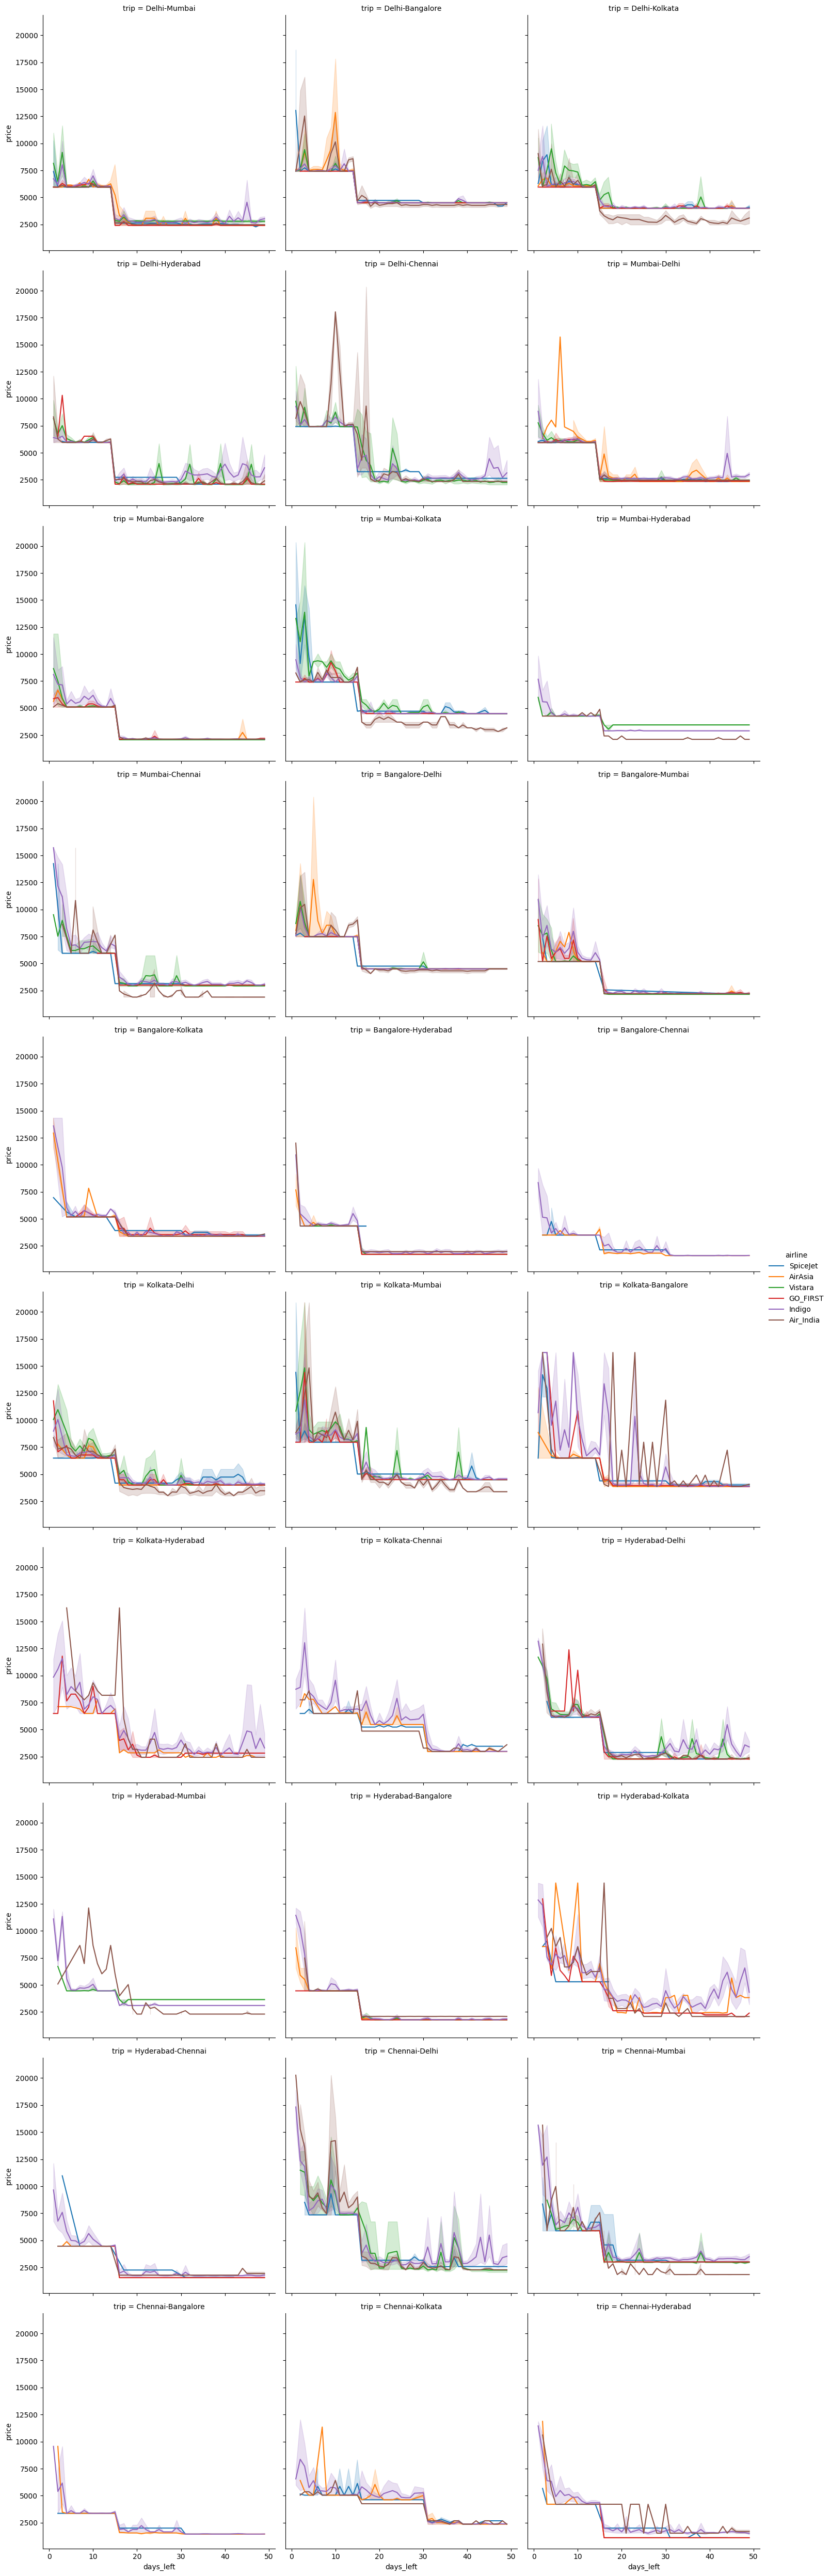

In [22]:
eco= df[df['class']=='Economy'].query('stops=="zero"')
fig= sns.relplot(data=eco,
                 x= 'days_left',
                 y= 'price',
                 kind='line',
                 hue= 'airline',
                 col='trip',
                 col_wrap= 3,
                 )
fig

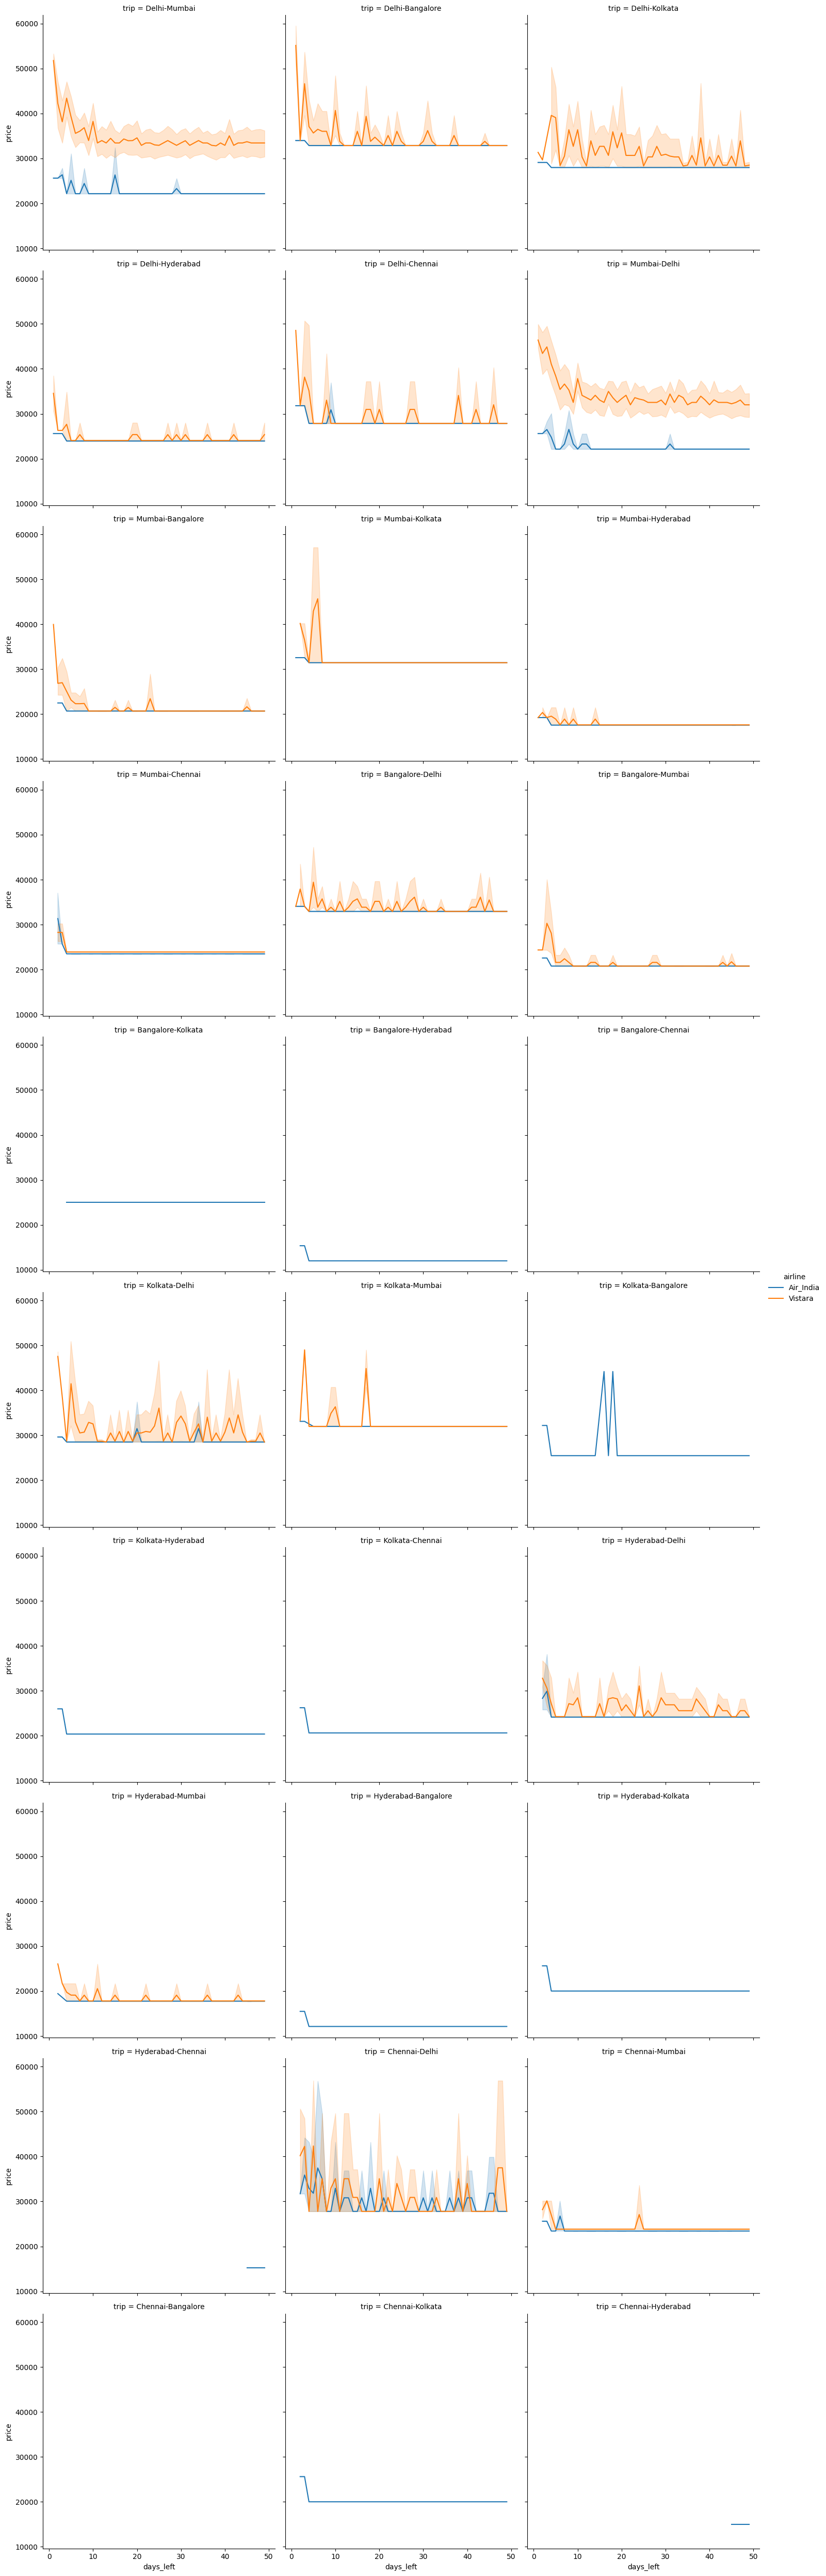

In [23]:
busi= df[df['class']=='Business'].query('stops=="zero"')
fig= sns.relplot(data=busi,
                 x= 'days_left',
                 y= 'price',
                 kind='line',
                 hue= 'airline',
                 col='trip',
                 col_wrap= 3,
                 )
fig

In [24]:
px.line(busi,
        x= 'days_left',
        y= 'price',
        color= 'airline',
        facet_col='trip',
        facet_col_wrap= 3,
        )

<AxesSubplot: xlabel='airline', ylabel='price'>

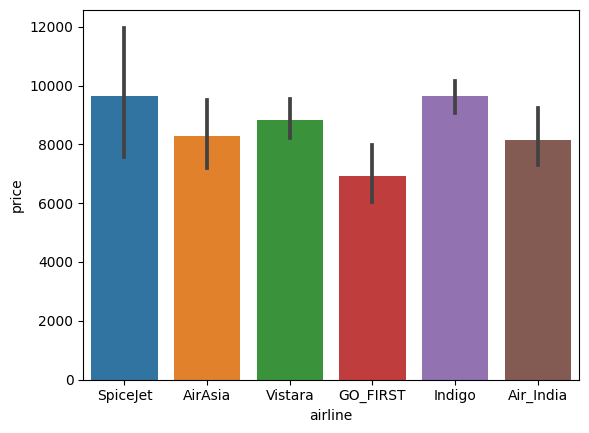

In [66]:
eco= df[df['class']=='Economy'].query('stops=="zero"').query('days_left== 1')
fig= sns.barplot(data=eco,
                 x= 'airline',
                 y= 'price',
                 #hue= 'airline',
                 #col='trip',
                 #col_wrap= 3,
                 )
fig

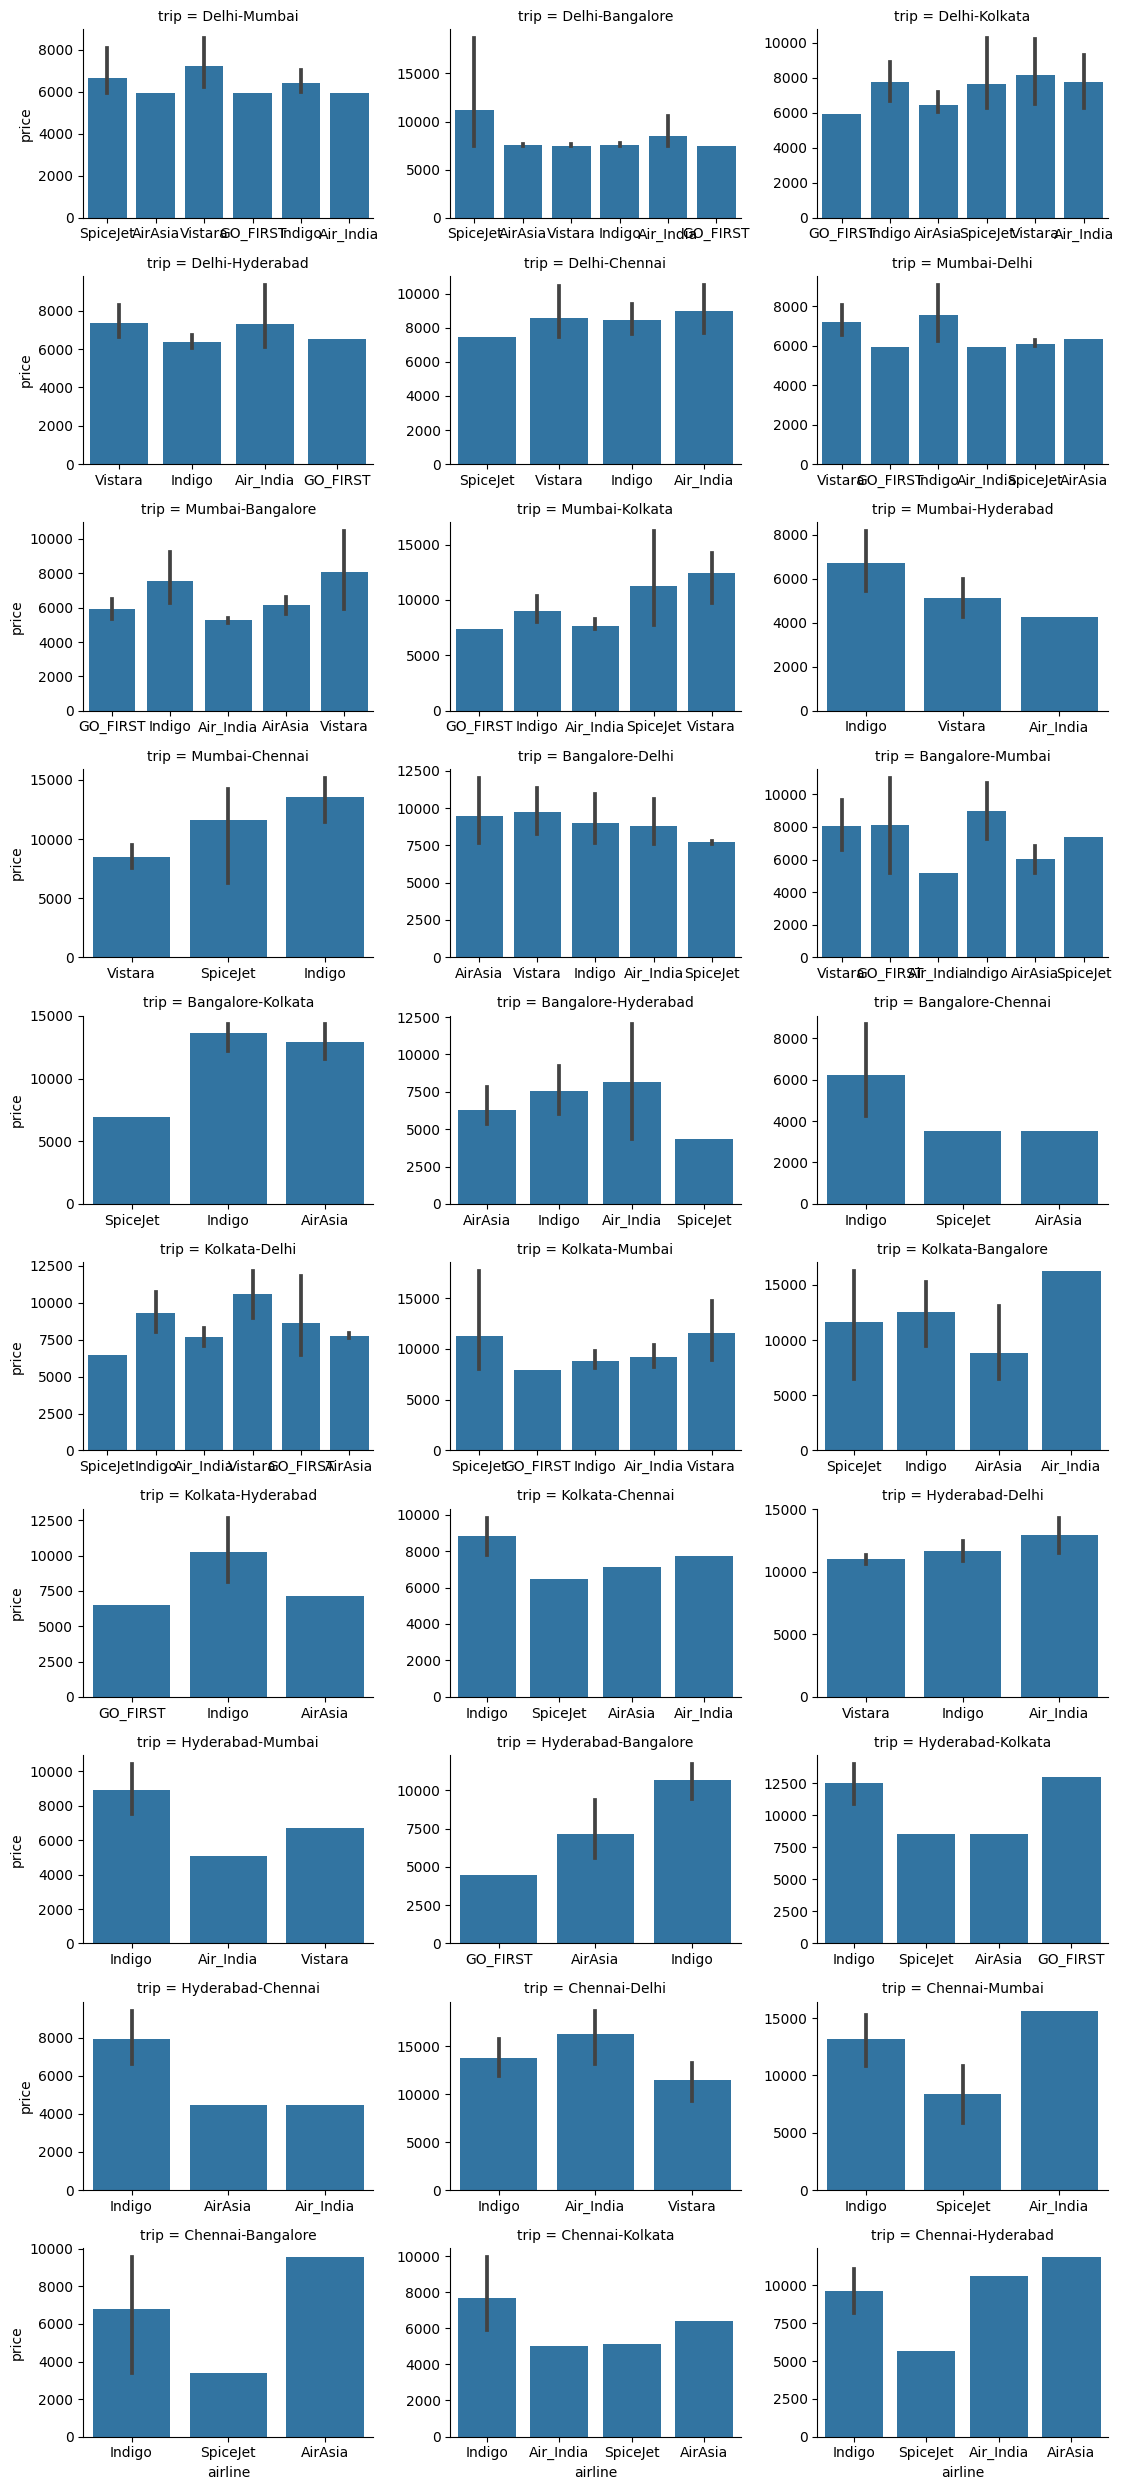

In [79]:
import matplotlib.pyplot as plt
eco = df[df['class']=='Economy'].query('stops=="zero"').query('days_left<=2')
g= sns.FacetGrid(eco,col='trip',col_wrap=3, height=2.5, aspect=1.5,sharex=False,sharey=False )
g.map(sns.barplot, 'airline','price', ).add_legend()


In [93]:
eco1= df[df['class']=='Economy'].query('stops=="zero"').query('days_left<= 2')
eco2= df[df['class']=='Economy'].query('stops=="zero"').query('days_left>= 15')
ww1=eco1.groupby(['trip','airline'],as_index=False).price.mean()
ww2=eco2.groupby(['trip','airline'],as_index=False).price.mean()
df1=pd.DataFrame(ww1)
df2=pd.DataFrame(ww2)
final_df= pd.merge(df1,df2,on=['trip','airline'])
final_df.rename(columns={'price_x':'price_1or2','price_y':'price_normal'}, inplace=True)
final_df['price_dif']= final_df['price_1or2']-final_df['price_normal']
final_df['dif_perc']= (final_df.price_dif/final_df.price_1or2)*100
final_df


,trip,airline,price_1or2,price_normal,price_dif,dif_perc
0,Bangalore-Chennai,AirAsia,3499.000000,1753.849558,1745.150442,49.875691
1,Bangalore-Chennai,Indigo,6219.333333,1865.893023,4353.440310,69.998504
2,Bangalore-Chennai,SpiceJet,3497.000000,1915.411765,1581.588235,45.227001
3,Bangalore-Delhi,AirAsia,9436.714286,4587.557471,4849.156814,51.386072
4,Bangalore-Delhi,Air_India,8795.666667,4515.704142,4279.962525,48.659899
...,...,...,...,...,...,...
119,Mumbai-Kolkata,Air_India,7693.000000,3644.885714,4048.114286,52.620750
120,Mumbai-Kolkata,GO_FIRST,7412.000000,4593.650000,2818.350000,38.024150
121,Mumbai-Kolkata,Indigo,9003.000000,4643.267677,4359.732323,48.425328
122,Mumbai-Kolkata,SpiceJet,11297.600000,4666.379747,6631.220253,58.695831


In [76]:
eco15= df[df['class']=='Economy'].query('stops=="zero"').query('days_left>= 15')
eco15.groupby(['trip','airline']).price.mean()

trip               airline  
Bangalore-Chennai  AirAsia      1753.849558
                   Air_India    1966.000000
                   Indigo       1865.893023
                   SpiceJet     1915.411765
Bangalore-Delhi    AirAsia      4587.557471
                                   ...     
Mumbai-Kolkata     Air_India    3644.885714
                   GO_FIRST     4593.650000
                   Indigo       4643.267677
                   SpiceJet     4666.379747
                   Vistara      4815.480000
Name: price, Length: 148, dtype: float64